
# **DSA210 PROJECT**

# **Elifnur Karahasan 22495**


**Important Note: In this coding section, I only gave brief titles/information for what is being presented. The actual explanations, interpretations and analysis can be found in the report section of this GitHub repository. As it is the actal project report, it is highly advised for readers to go through it.**

# PART I: OBTAINING & VISUALIZING DATA
**Obtaining The Data**

*   I obtained my personal data using Steam DB where you can see an account's various data reegarding their games.
*   I copied my account's data from Steam DB and put them into an excel file.
*   Using google collab's file uploading feature, I uploaded the excel file,  and started visualizing my data to clearly see my data, correlations, and identify the key data that appear to 'shine through' among the remaining data.
*   Firstly, I imported the required libraries and enabled file uploading and reading. I preprocessed my data by converting related values to numeric values, and to better process the data, I converted minutes (denoted by m) to hours (denoted by h, which is used throughout the majority of my data) and splitted genres into seperate rows.








In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the dataset
data = pd.read_excel(next(iter(uploaded.keys())))

# Step 3: Preprocess the data
# Convert 'Price' to numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').fillna(0)

# Convert 'Time' to hours
def convert_time_to_hours_safe(time_str):
    if pd.isna(time_str):  # Handle missing values
        return 0
    elif 'h' in time_str:
        return float(time_str.replace('h', ''))
    elif 'm' in time_str:
        return float(time_str.replace('m', '')) / 60
    else:
        return 0

data['Time'] = data['Time'].apply(convert_time_to_hours_safe)
data['Price/Hour'] = pd.to_numeric(data['Price/Hour'], errors='coerce')  # Ensure Price/Hour is numeric
data['Price/Hour'] = data['Price/Hour'].replace([np.inf, -np.inf], 0)  # Replace infinities with 0
data['Price/Hour'] = data['Price/Hour'].fillna(0)  # Replace NaN values with 0


# Calculate summaries for each genre
genre_summary = data.groupby('Genre').agg({
    'Time': 'sum',
    'Price': 'sum',
    'Rating': 'mean',
    'Price/Hour': 'mean'
}).reset_index()

Saving DSA210_data.xlsx to DSA210_data (1).xlsx


**Visuualization 1: Pie Chart For Genre Distribution**


*   Firstly, I visualized every genre in my data to be presented in a form of pie chart. This visualization option was chosen in order to clearly see which genres take up most of the games in my Steam account.



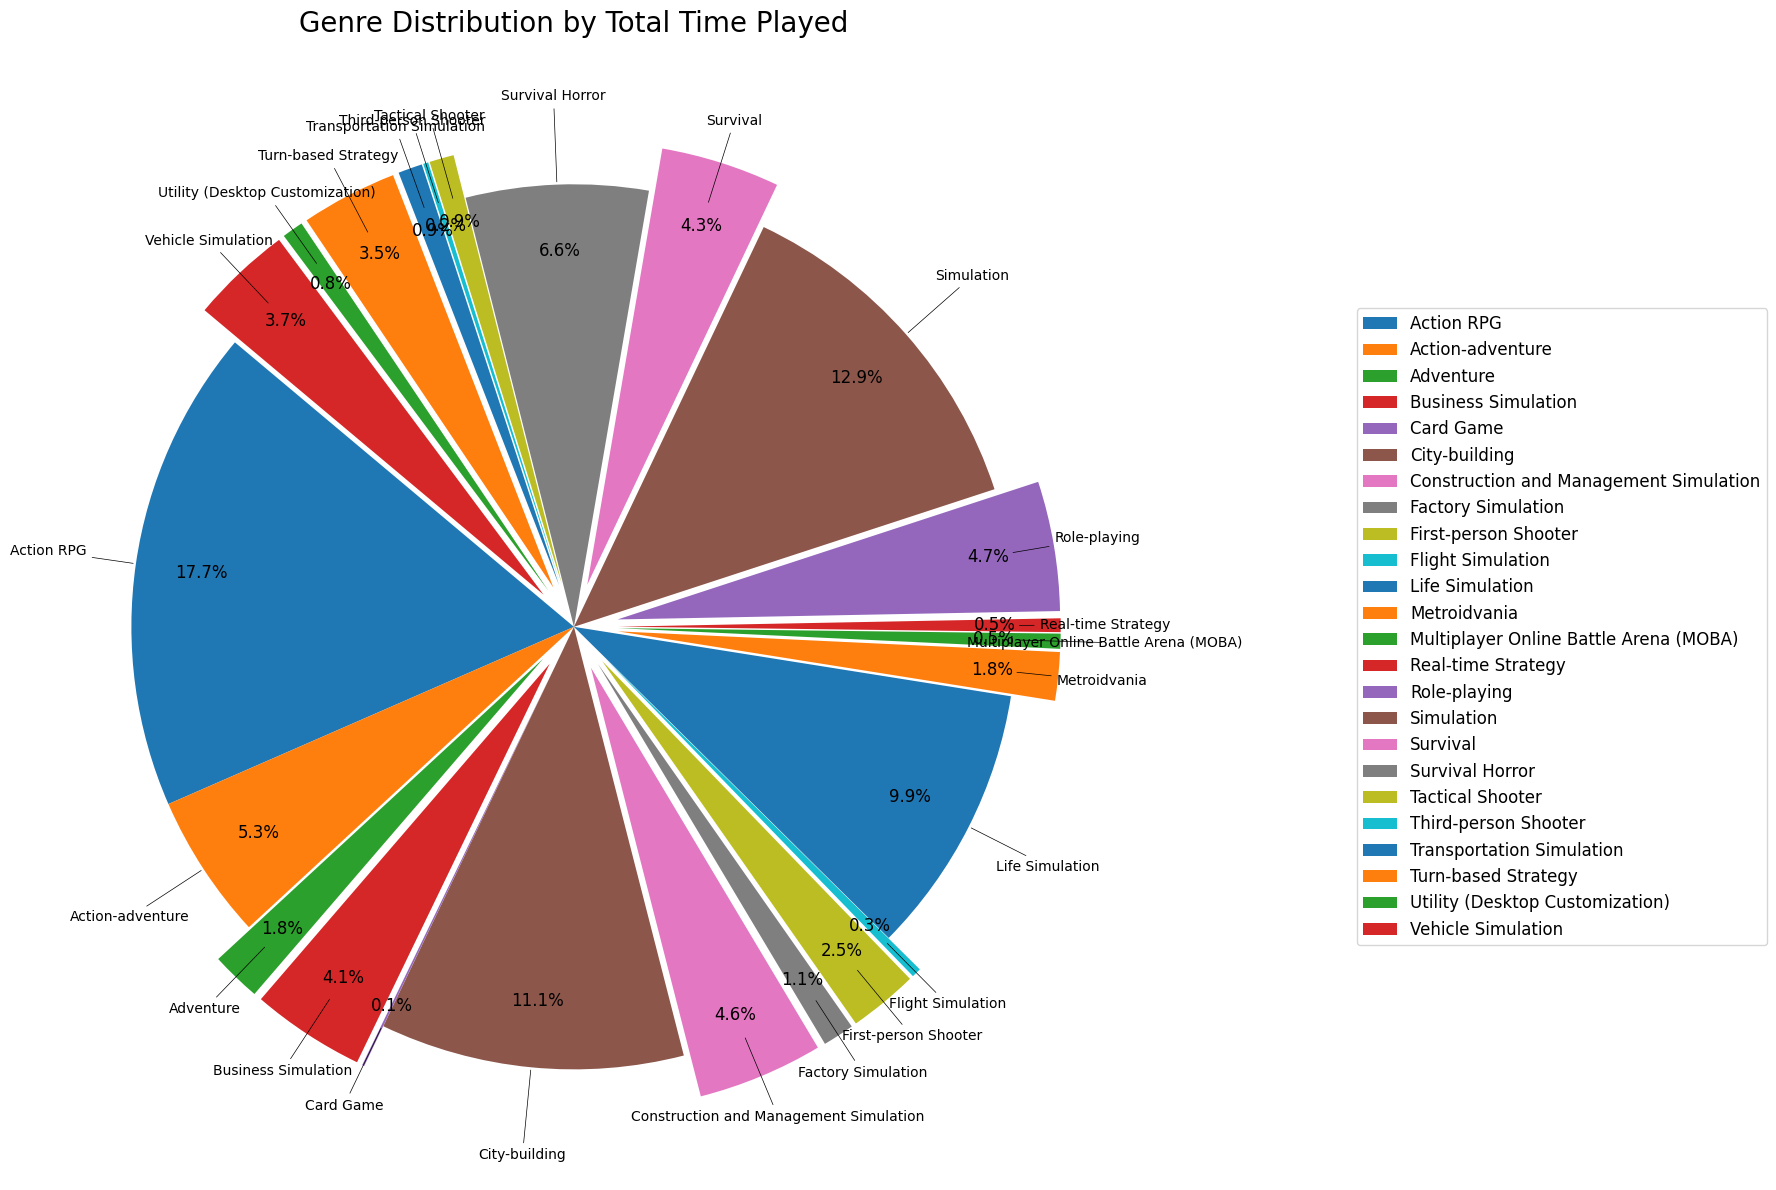

In [ ]:
# Visualization 1 - Pie chart for genre distribution

plt.figure(figsize=(16, 12))  # Larger figure size for better readability

# Calculate the explode values to separate small slices
explode = [0.1 if val < 5 else 0 for val in (genre_summary['Time'] / genre_summary['Time'].sum()) * 100]

# Create the pie chart without default labels
wedges, texts, autotexts = plt.pie(
    genre_summary['Time'],
    labels=None,  # Remove default labels
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Explode small slices
    textprops={'fontsize': 12},  # Font size for percentages
    pctdistance=0.85  # Adjust distance of percentages from the center
)

# Add custom labels extending diagonally
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Average angle of the slice
    x = np.cos(np.radians(angle))  # X-coordinate for label
    y = np.sin(np.radians(angle))  # Y-coordinate for label
    plt.annotate(
        genre_summary['Genre'].iloc[i],  # Genre label
        xy=(x, y),
        xytext=(1.2 * x, 1.2 * y),
        arrowprops=dict(arrowstyle="-", lw=0.5),
        fontsize=10,
        ha='center',
        va='center'
    )

# Title and legend
plt.title('Genre Distribution by Total Time Played', fontsize=20, pad=30)
plt.tight_layout()
plt.legend(
    genre_summary['Genre'],
    loc="center left",
    bbox_to_anchor=(1.2, 0.5),
    fontsize=12  # Adjust font size for legend
)
plt.show()

**Visualization 2: Total hours spent per genre**


*   I visualized my data on the amount of hours I have played the games in each genre, and I implemented this visualization in a bar chart manner in order to clearly see which genre of games I have spent most of my time playing.
   

**Visualization 3 - Total money spent per genre**


*   Similarly, I visualized my data as a bar chart in order to see how much money I spent for a game genre in total. This bar char visualization will help in seeing which genres are the ones coming up highest, which genres are closer, and which are really low.

*   This visualization will also give an insight on which genres are more on the 'costly' side and which are more affordable. I can then derive to what extend I care about a game's price when purchasing them by looking at the number of games I have for each genre, which I visualized in further visualization pieces of this section.






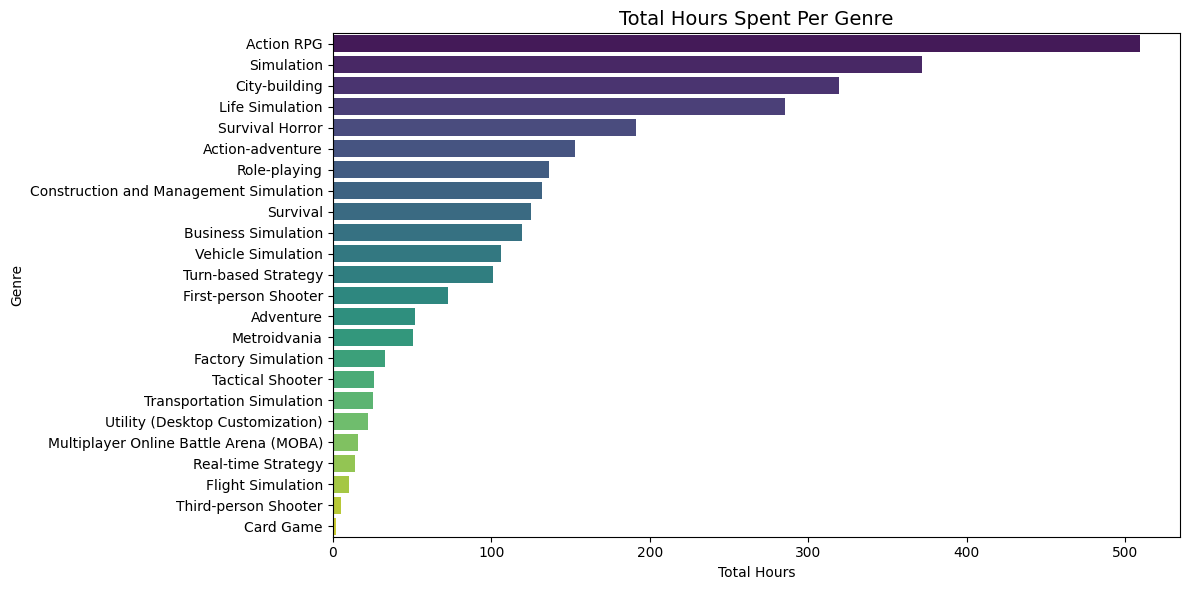

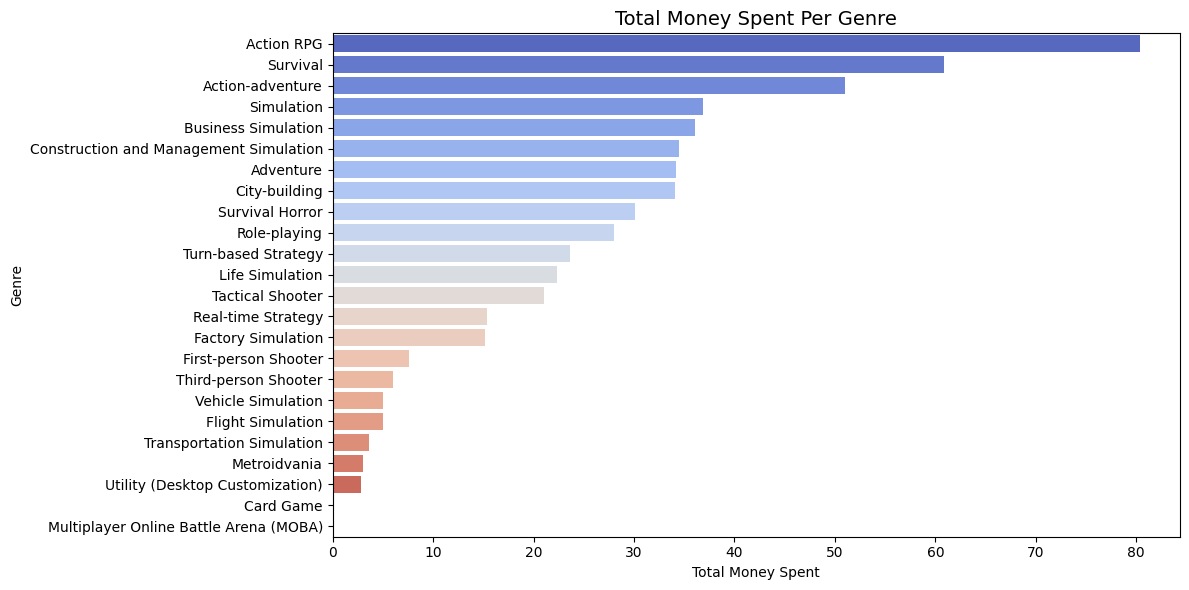

In [ ]:
# Visualization 2 - Total hours spent per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_summary.sort_values('Time', ascending=False), x='Time', y='Genre', hue='Genre', dodge=False, palette='viridis')
plt.title('Total Hours Spent Per Genre', fontsize=14)
plt.xlabel('Total Hours')
plt.ylabel('Genre')
plt.legend([], [], frameon=False)  # Hide the legend for hue
plt.tight_layout()
plt.show()

# Visualization 3 - Total money spent per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_summary.sort_values('Price', ascending=False), x='Price', y='Genre', hue='Genre', dodge=False, palette='coolwarm')
plt.title('Total Money Spent Per Genre', fontsize=14)
plt.xlabel('Total Money Spent')
plt.ylabel('Genre')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

**Visualization 4: Correlation heatmap among numerical features**


*   In order to see any existing positive or negative correlations between my data, I made a visualization of a correlation heatmap. The findings are given in the report.


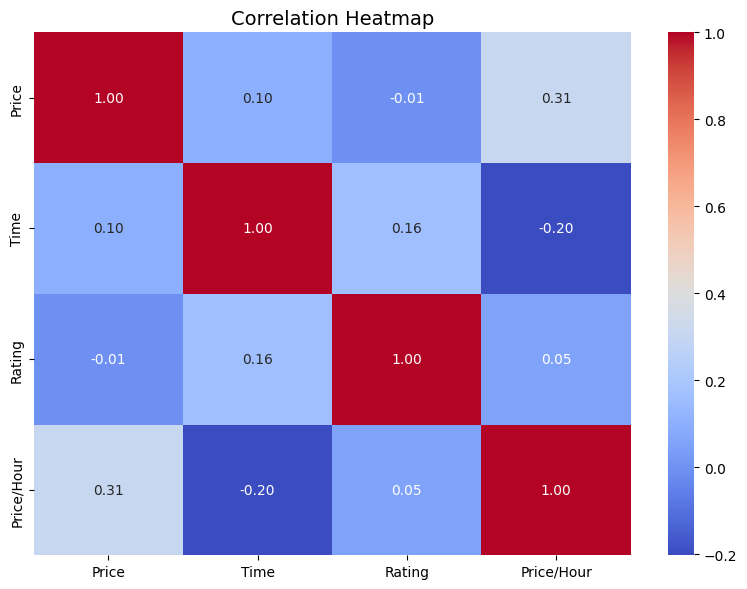

In [ ]:
# Visualization 4 - Correlation heatmap among numerical features
numerical_data = data[['Price', 'Time', 'Rating', 'Price/Hour']].dropna()
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

**Visualization 5: Average rating per genre**


*   I visualized this data in order to see the popularity level of the games in a genre I have played. Visualizing this data showed me how popular were the games I was playing in a genre.



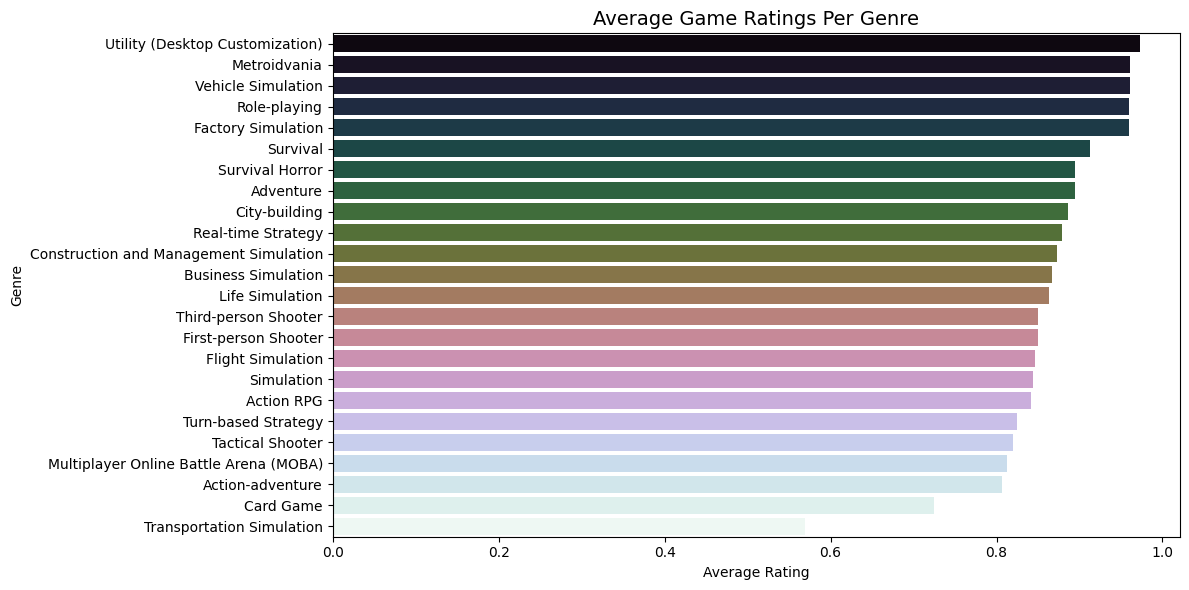

In [ ]:
# Visualization 5 - Average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_summary.sort_values('Rating', ascending=False), x='Rating', y='Genre', hue='Genre', dodge=False, palette='cubehelix')
plt.title('Average Game Ratings Per Genre', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend([], [], frameon=False)  # Hide the legend for hue
plt.tight_layout()
plt.show()

**Visualization 6: Number of Games Per Genre**


*   I visualized this data as a bar chart showing how many games belong to each genre. This visualization can indicate the popularity of genres in my collection, and this information can helpme derive which genre picques my interest more and which genre of game I tend to buy the most.




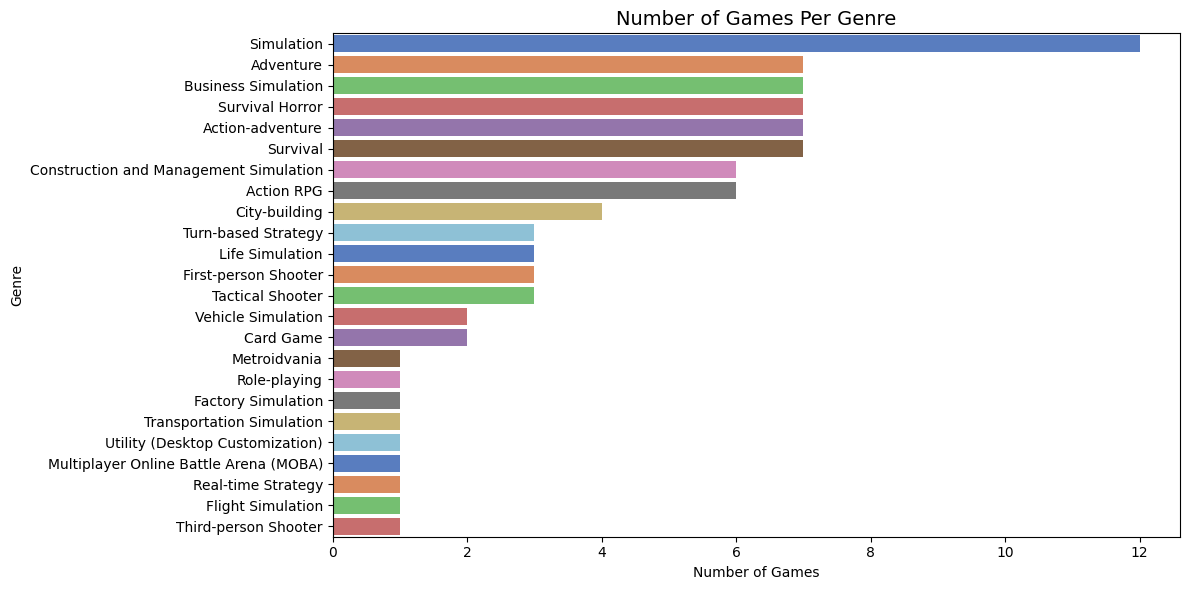

In [55]:
#Visualization 6 - Number of Games Per Genre

plt.figure(figsize=(12, 6))
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Game Count']
sns.barplot(data=genre_counts, x='Game Count', y='Genre', palette='muted')
plt.title('Number of Games Per Genre', fontsize=14)
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


**Visualization 7: Efficiency Analysis Scatter Plot**


*   I visualized the data to form this plot in hopes that it can help me see the relationship between how much money I spent per hour and the total time I spent playing games in different genres.
*   This visualized data can then be interpreted as an 'efficiency' measure as the more time I spend for a game that costs less money per hour, the more efficient it becomes.



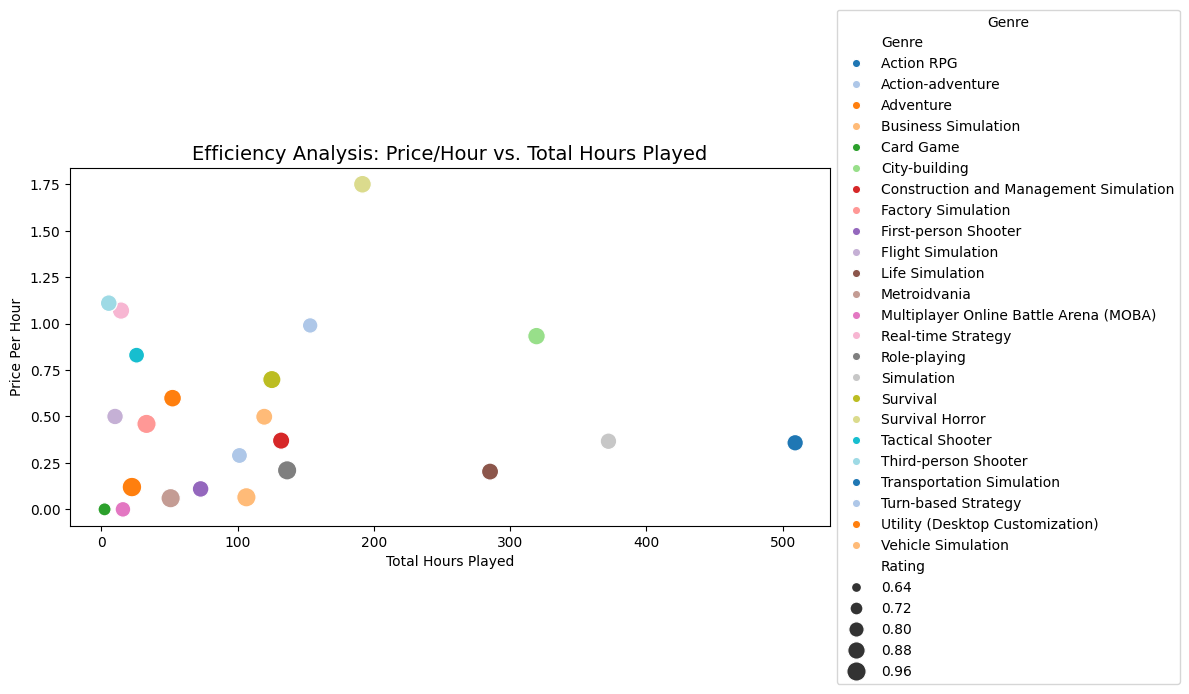

In [61]:
#Visualization 7 - Efficiency Analysis Scatterplot

plt.figure(figsize=(12, 6))

# Using a more distinct and drastic colormap
palette = sns.color_palette("tab20", len(genre_summary['Genre']))

sns.scatterplot(
    data=genre_summary,
    x='Time',
    y='Price/Hour',
    hue='Genre',
    size='Rating',
    sizes=(20, 200),
    palette=palette
)


plt.title('Efficiency Analysis: Price/Hour vs. Total Hours Played', fontsize=14)
plt.xlabel('Total Hours Played')
plt.ylabel('Price Per Hour')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Genre")
plt.tight_layout()
plt.show()


**Visualization 8: Total amounts per each genre**


*   I implemented this visualization as an overall summary table. The table shows the total amounts of how many hours I played games of each genre, how much money I spent in buying games of each genre, and each genre's average rating.
*   Visualizing this data informed me about my overall investment in specific genre's by showing total amounts in numbers.



In [ ]:
# Visualization 8 - Table showing total amounts

# Rename columns in genre_summary for clarity
genre_summary.rename(columns={
    'Time': 'Total Hours Played',
    'Price': 'Total Money Spent (USD)',
    'Rating': 'Average Rating'
}, inplace=True)

# Display the genre summary as an interactive table with updated column names
from google.colab.data_table import DataTable
DataTable(genre_summary)



,Genre,Total Hours Played,Total Money Spent (USD),Average Rating,Price/Hour
0,Action RPG,509.100000,80.34,0.841417,0.358333
1,Action-adventure,153.200000,50.96,0.807029,0.990000
2,Adventure,52.200000,34.14,0.894243,0.598571
3,Business Simulation,119.500000,36.08,0.866571,0.498571
4,Card Game,2.316667,0.00,0.725050,0.000000
5,City-building,319.300000,34.11,0.886525,0.932500
6,Construction and Management Simulation,131.900000,34.44,0.872750,0.370000
7,Factory Simulation,33.100000,15.19,0.959500,0.460000
8,First-person Shooter,72.800000,7.63,0.850033,0.110000
9,Flight Simulation,10.000000,4.99,0.846300,0.500000


# **PART II: MACHINE LEARNING MODELS**
*   I chose to use three machine learning models to predict future preferences based on my data. These models are Decision Tree, Random Forest, and Naive Bayes.
*   First, we will import the necessary libraries and start our modeling.

In [19]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




**Machine Learning Model 1: Decision Tree Model**

Cross-Validation Accuracy Scores (Decision Tree Classifier): [0.55172414 0.31034483 0.55172414 0.62068966 0.53571429]
Mean Cross-Validation Accuracy (Decision Tree Classifier): 0.5140394088669951
Decision Tree Classifier Test Set Accuracy: 0.6666666666666666
                                        precision    recall  f1-score   support

                      Action-adventure       0.00      0.00      0.00         2
                             Adventure       0.00      0.00      0.00         2
                   Business Simulation       1.00      0.40      0.57         5
                             Card Game       1.00      1.00      1.00         3
                         City-building       1.00      1.00      1.00         1
Construction and Management Simulation       0.67      1.00      0.80         2
                  First-person Shooter       0.67      1.00      0.80         2
                       Life Simulation       1.00      1.00      1.00         1
                    

<Figure size 800x600 with 0 Axes>

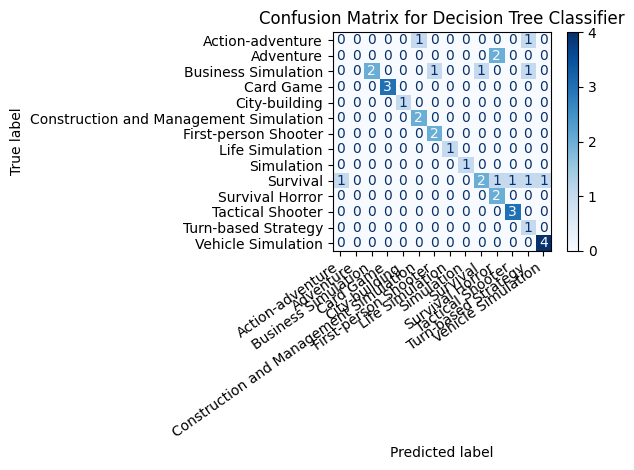

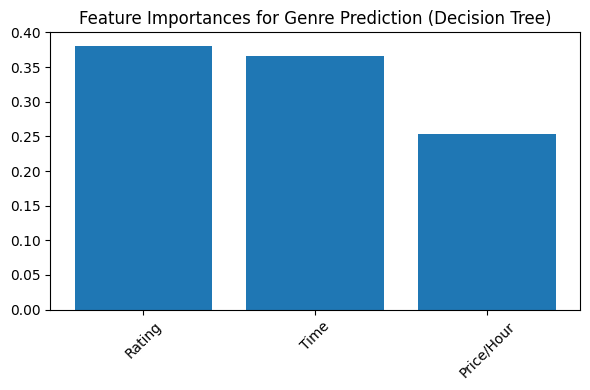

Cross-Validation RMSE Scores (Decision Tree Regressor): [4.59230723 3.21818494 2.97224542 2.81369356 5.22765039]
Mean Cross-Validation RMSE (Decision Tree Regressor): 3.7648163071251872
Decision Tree Regressor Test Set RMSE: 5.854178944233864
Average Price in Test Set: 6.703888888888888
Predicted Genre for the new game (Decision Tree): Simulation
Predicted Price for the new game (Decision Tree): $ 7.86


In [38]:
# Encode genre as numbers
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])

# Data for Classification (Predicting Genre)
X_clf = data[['Price/Hour', 'Time', 'Rating']].copy()
y_clf = data['Genre_encoded'].copy()

# Filter out rare classes with fewer than the minimum required samples
min_samples_required = 2  # Minimum samples needed for SMOTE
class_counts = y_clf.value_counts()
valid_classes = class_counts[class_counts >= min_samples_required].index

# Keep only valid classes
X_clf_filtered = X_clf[y_clf.isin(valid_classes)].reset_index(drop=True)
y_clf_filtered = y_clf[y_clf.isin(valid_classes)].reset_index(drop=True)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=1)  # Use k_neighbors=1 for edge cases
X_clf_resampled, y_clf_resampled = smote.fit_resample(X_clf_filtered, y_clf_filtered)

# Classification split (after applying SMOTE)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_resampled, y_clf_resampled, test_size=0.2, random_state=42
)

# Data for Regression (Predicting Price)
X_reg = data[['Price/Hour', 'Time', 'Rating', 'Genre_encoded']].copy()
y_reg = data['Price'].copy()

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Cross-Validation for Classifier
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores_clf = cross_val_score(dt_classifier, X_train_clf, y_train_clf, cv=cv_clf, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Decision Tree Classifier):", cv_scores_clf)
print("Mean Cross-Validation Accuracy (Decision Tree Classifier):", cv_scores_clf.mean())

# Train the classifier on the entire training set
dt_classifier.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_clf = dt_classifier.predict(X_test_clf)

# Evaluate
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Decision Tree Classifier Test Set Accuracy:", accuracy)

# Classification report
unique_classes = unique_labels(y_test_clf, y_pred_clf)
print(
    classification_report(
        y_test_clf,
        y_pred_clf,
        labels=unique_classes,
        target_names=label_encoder.inverse_transform(unique_classes),
        zero_division=0
    )
)

# Compute the confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

# Get the unique classes from the test data (y_test_clf)
unique_classes = np.unique(y_test_clf)

# Decode class labels back to their genre names
class_labels = label_encoder.inverse_transform(unique_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Feature Importance Chart
importances = dt_classifier.feature_importances_
feature_names = X_clf.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.title("Feature Importances for Genre Prediction (Decision Tree)")
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

#  Cross-Validation for Regressor
cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores_reg = cross_val_score(dt_regressor, X_train_reg, y_train_reg, cv=cv_reg, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores_reg)
print("Cross-Validation RMSE Scores (Decision Tree Regressor):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Decision Tree Regressor):", cv_rmse_scores.mean())

# Train the regressor on the entire training set
dt_regressor.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = dt_regressor.predict(X_test_reg)

# Evaluate using RMSE
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print("Decision Tree Regressor Test Set RMSE:", rmse)
print("Average Price in Test Set:", np.mean(y_test_reg))

# Example "new game" scenario
new_game = pd.DataFrame({
    'Price/Hour': [0.20],
    'Time': [50],
    'Rating': [90]
})

# Predict the Genre
genre_pred_encoded = dt_classifier.predict(new_game)
genre_pred = label_encoder.inverse_transform(genre_pred_encoded)
print("Predicted Genre for the new game (Decision Tree):", genre_pred[0])

# Predict the Price
new_game_for_reg = new_game.copy()
new_game_for_reg['Genre_encoded'] = genre_pred_encoded
price_pred = dt_regressor.predict(new_game_for_reg)
print("Predicted Price for the new game (Decision Tree): $", round(price_pred[0], 2))

**Machine Learning Model 2: Random Forest**

Cross-Validation Accuracy Scores (Random Forest Classifier): [0.55172414 0.34482759 0.65517241 0.55172414 0.60714286]
Mean Cross-Validation Accuracy (Random Forest Classifier): 0.5421182266009852
Random Forest Classifier Test Set Accuracy: 0.6111111111111112
                                        precision    recall  f1-score   support

                      Action-adventure       0.00      0.00      0.00         2
                             Adventure       0.00      0.00      0.00         2
                   Business Simulation       1.00      0.40      0.57         5
                             Card Game       1.00      1.00      1.00         3
                         City-building       0.50      1.00      0.67         1
Construction and Management Simulation       1.00      1.00      1.00         2
                  First-person Shooter       0.20      0.50      0.29         2
                       Life Simulation       1.00      1.00      1.00         1
                    

<Figure size 1200x800 with 0 Axes>

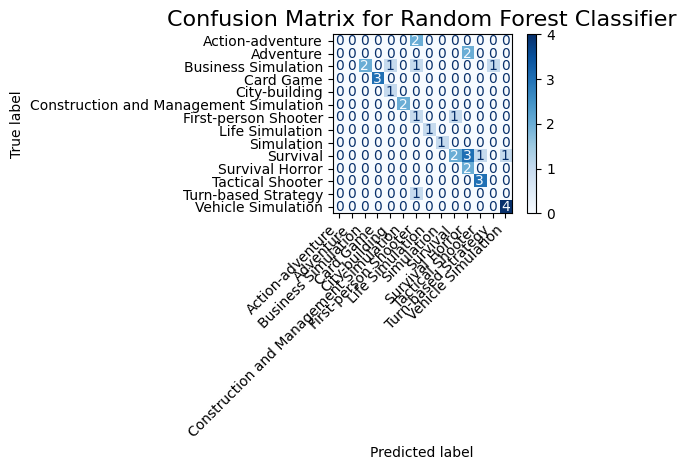

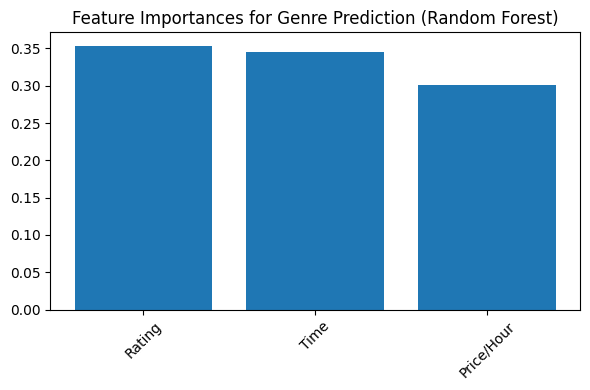

Cross-Validation RMSE Scores (Random Forest Regressor): [4.72234463 2.89844802 2.49497931 3.64045812 4.08941748]
Mean Cross-Validation RMSE (Random Forest Regressor): 3.569129512947284
Random Forest Regressor Test Set RMSE: 5.186256318546805
Average Price in Test Set: 6.703888888888888
Predicted Genre for the new game (Random Forest): Vehicle Simulation
Predicted Price for the new game (Random Forest): $ 8.2


In [45]:

# Encode genre as numbers
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])

# Data for Classification (Predicting Genre)
X_clf = data[['Price/Hour', 'Time', 'Rating']].copy()
y_clf = data['Genre_encoded'].copy()

# Filter out rare classes with fewer than the minimum required samples
min_samples_required = 2  # Minimum samples needed for SMOTE
class_counts = y_clf.value_counts()
valid_classes = class_counts[class_counts >= min_samples_required].index

# Keep only valid classes
X_clf_filtered = X_clf[y_clf.isin(valid_classes)].reset_index(drop=True)
y_clf_filtered = y_clf[y_clf.isin(valid_classes)].reset_index(drop=True)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=1)  # Use k_neighbors=1 for edge cases
X_clf_resampled, y_clf_resampled = smote.fit_resample(X_clf_filtered, y_clf_filtered)

# Classification split (after applying SMOTE)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_resampled, y_clf_resampled, test_size=0.2, random_state=42
)

# 2) Data for Regression (Predicting Price)
X_reg = data[['Price/Hour', 'Time', 'Rating', 'Genre_encoded']].copy()
y_reg = data['Price'].copy()

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

#  Cross-Validation for Classifier
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# Perform cross-validation
cv_scores_clf = cross_val_score(rf_classifier, X_train_clf, y_train_clf, cv=cv_clf, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Random Forest Classifier):", cv_scores_clf)
print("Mean Cross-Validation Accuracy (Random Forest Classifier):", cv_scores_clf.mean())

# Train the classifier on the entire training set
rf_classifier.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_clf_rf = rf_classifier.predict(X_test_clf)

# Evaluate
accuracy_rf = accuracy_score(y_test_clf, y_pred_clf_rf)
print("Random Forest Classifier Test Set Accuracy:", accuracy_rf)

# Classification report
unique_classes_rf = unique_labels(y_test_clf, y_pred_clf_rf)
print(
    classification_report(
        y_test_clf,
        y_pred_clf_rf,
        labels=unique_classes_rf,
        target_names=label_encoder.inverse_transform(unique_classes_rf),
        zero_division=0
    )
)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test_clf, y_pred_clf_rf, labels=unique_classes_rf)

# Decode class labels back to their genre names
class_labels_rf = label_encoder.inverse_transform(unique_classes_rf)

# Display the confusion matrix
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels_rf)
disp_rf.plot(cmap='Blues', values_format='d')

# Adjust title and labels
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Feature Importance Chart
importances_rf = rf_classifier.feature_importances_
feature_names_rf = X_clf.columns
sorted_indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(6, 4))
plt.title("Feature Importances for Genre Prediction (Random Forest)")
plt.bar(range(len(importances_rf)), importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(len(importances_rf)), feature_names_rf[sorted_indices_rf], rotation=45)
plt.tight_layout()
plt.show()

# Cross-Validation for Regressor
cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores_reg = cross_val_score(rf_regressor, X_train_reg, y_train_reg, cv=cv_reg, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores_reg)
print("Cross-Validation RMSE Scores (Random Forest Regressor):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Random Forest Regressor):", cv_rmse_scores.mean())

# Train the regressor on the entire training set
rf_regressor.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg_rf = rf_regressor.predict(X_test_reg)

# Evaluate using RMSE
mse_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regressor Test Set RMSE:", rmse_rf)
print("Average Price in Test Set:", np.mean(y_test_reg))

# Example "new game" scenario
new_game_rf = pd.DataFrame({
    'Price/Hour': [0.20],
    'Time': [50],
    'Rating': [90]
})

# First, Predict the Genre
genre_pred_encoded_rf = rf_classifier.predict(new_game_rf)
genre_pred_rf = label_encoder.inverse_transform(genre_pred_encoded_rf)
print("Predicted Genre for the new game (Random Forest):", genre_pred_rf[0])

# Secondly, Predict the Price
new_game_for_reg_rf = new_game_rf.copy()
new_game_for_reg_rf['Genre_encoded'] = genre_pred_encoded_rf
price_pred_rf = rf_regressor.predict(new_game_for_reg_rf)
print("Predicted Price for the new game (Random Forest): $", round(price_pred_rf[0], 2))


**Machine Learning Model 3: Naive Bayes Model**

Cross-Validation Accuracy Scores (Naive Bayes Classifier): [0.37931034 0.31034483 0.4137931  0.37931034 0.42857143]
Mean Cross-Validation Accuracy (Naive Bayes Classifier): 0.38226600985221676
Naive Bayes Classifier Test Set Accuracy: 0.4444444444444444
                                        precision    recall  f1-score   support

                      Action-adventure       0.00      0.00      0.00         2
                             Adventure       0.00      0.00      0.00         2
                   Business Simulation       0.00      0.00      0.00         5
                             Card Game       0.60      1.00      0.75         3
                         City-building       0.00      0.00      0.00         1
Construction and Management Simulation       0.25      0.50      0.33         2
                  First-person Shooter       0.50      1.00      0.67         2
                       Life Simulation       0.50      1.00      0.67         1
                         

<Figure size 1200x800 with 0 Axes>

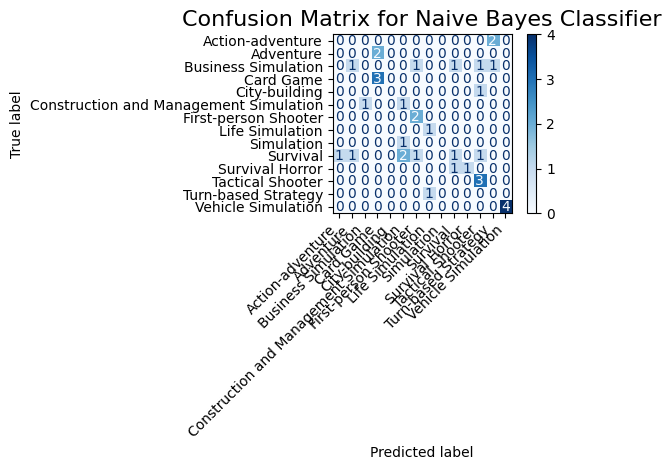

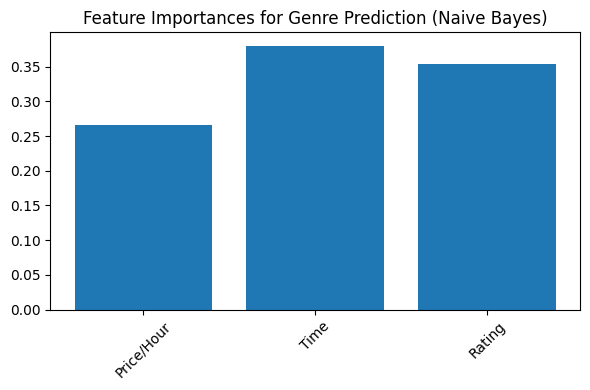

Predicted Genre for the new game (Naive Bayes): Turn-based Strategy


In [64]:

#Encode genre as numbers
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])

#Data for Classification (Predicting Genre)
X_clf = data[['Price/Hour', 'Time', 'Rating']].copy()
y_clf = data['Genre_encoded'].copy()

# Filter out rare classes with fewer than the minimum required samples
min_samples_required = 2
class_counts = y_clf.value_counts()
valid_classes = class_counts[class_counts >= min_samples_required].index

# Keep only valid classes
X_clf_filtered = X_clf[y_clf.isin(valid_classes)].reset_index(drop=True)
y_clf_filtered = y_clf[y_clf.isin(valid_classes)].reset_index(drop=True)

# Scale the features
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf_filtered)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_clf_resampled, y_clf_resampled = smote.fit_resample(X_clf_scaled, y_clf_filtered)

# Classification split (after applying SMOTE)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_resampled, y_clf_resampled, test_size=0.2, random_state=42
)

# Cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nb_classifier = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_train_clf, y_train_clf, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Naive Bayes Classifier):", cv_scores)
print("Mean Cross-Validation Accuracy (Naive Bayes Classifier):", cv_scores.mean())

# Train the Naive Bayes classifier on the full training set
nb_classifier.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred_clf_nb = nb_classifier.predict(X_test_clf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_clf, y_pred_clf_nb)
print("Naive Bayes Classifier Test Set Accuracy:", accuracy_nb)

# Classification report
unique_classes_nb = unique_labels(y_test_clf, y_pred_clf_nb)
print(
    classification_report(
        y_test_clf,
        y_pred_clf_nb,
        labels=unique_classes_nb,
        target_names=label_encoder.inverse_transform(unique_classes_nb),
        zero_division=0
    )
)

# Compute the confusion matrix
cm_nb = confusion_matrix(y_test_clf, y_pred_clf_nb, labels=unique_classes_nb)

# Decode class labels back to their genre names
class_labels_nb = label_encoder.inverse_transform(unique_classes_nb)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=class_labels_nb)
disp_nb.plot(cmap='Blues', values_format='d')

# Adjust title and labels
plt.title("Confusion Matrix for Naive Bayes Classifier", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Feature importance for Naive Bayes (approximated)
# Approximate feature importance using variances of input features
variances = np.var(X_clf_resampled, axis=0)
feature_importance = variances / np.sum(variances)

# Visualize feature importance
plt.figure(figsize=(6, 4))
plt.title("Feature Importances for Genre Prediction (Naive Bayes)")
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_clf.columns, rotation=45)
plt.tight_layout()
plt.show()


#  Predict the genre for a new game
new_game_nb_scaled = scaler.transform(pd.DataFrame({
    'Price/Hour': [0.20],
    'Time': [50],
    'Rating': [90]
}))

genre_pred_encoded_nb = nb_classifier.predict(new_game_nb_scaled)
genre_pred_nb = label_encoder.inverse_transform(genre_pred_encoded_nb)
print("Predicted Genre for the new game (Naive Bayes):", genre_pred_nb[0])